In [1]:
import os
import pandas as pd

# Folder containing your CSV files
folder = "raw data"

# List all CSV files
files = [f for f in os.listdir(folder) if f.endswith(".csv")]

# Separate files by type using content identification
wind_files = []
weather_files = []

for file in files:
    with open(os.path.join(folder, file), 'r') as f:
        for line in f:
            if "Wind power" in line:
                wind_files.append(file)
                break
            elif "Weather" in line:
                weather_files.append(file)
                break

# Function to load CSV skipping metadata rows (lines starting with #)
def load_csv(path):
    return pd.read_csv(path, comment="#")

# Match and process corresponding wind & weather files
for wind_file in wind_files:
    # Find matching weather file based on name pattern (lat_lon_year)
    parts = wind_file.split("_")
    key = "_".join(parts[2:])  # e.g., "51.4538_-2.5973_2024.csv"

    matching_weather = next((wf for wf in weather_files if wf.endswith(key)), None)
    if matching_weather:
        # Load both files
        wind_df = load_csv(os.path.join(folder, wind_file))
        weather_df = load_csv(os.path.join(folder, matching_weather))

        # Merge on 'time' column
        merged_df = pd.merge(weather_df, wind_df[['time', 'wind_speed']], on='time', how='left')

        # Save updated weather file (overwrite or save new)
        output_path = os.path.join(folder, f"merged_{matching_weather}")
        merged_df.to_csv(output_path, index=False)

        print(f"✅ Merged wind speed into {matching_weather} -> saved as merged_{matching_weather}")
    else:
        print(f"⚠️ No matching weather file found for {wind_file}")


✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2015.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2015.csv
✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2016.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2016.csv
✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2017.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2017.csv
✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2018.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2018.csv
✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2019.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2019.csv
✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2020.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2020.csv
✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2021.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2021.csv
✅ Merged wind speed into ninja_weather_51.4538_-2.5973_2022.csv -> saved as merged_ninja_weather_51.4538_-2.5973_2022.csv
✅ Merged wind speed into

In [2]:
import pandas as pd

# Path to the merged file
file_path = "raw data/merged_ninja_weather_51.4538_-2.5973_2024.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,time,local_time,t2m,prectotland,precsnoland,snomas,rhoa,swgdn,swtdn,cldtot,wind_speed
0,2024-01-01 00:00,2024-01-01 00:00,7.411,0.031,0.0,0.0,1.221,0.0,0.0,0.809,12.833
1,2024-01-01 01:00,2024-01-01 01:00,7.327,0.034,0.0,0.0,1.223,0.0,0.0,0.865,12.518
2,2024-01-01 02:00,2024-01-01 02:00,7.198,0.021,0.0,0.0,1.225,0.0,0.0,0.938,11.961
3,2024-01-01 03:00,2024-01-01 03:00,6.838,0.012,0.0,0.0,1.227,0.0,0.0,0.953,11.206
4,2024-01-01 04:00,2024-01-01 04:00,6.510,0.005,0.0,0.0,1.229,0.0,0.0,0.954,10.473


In [3]:
file_path = "raw data/merged_ninja_weather_51.4538_-2.5973_2023.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,time,local_time,t2m,prectotland,precsnoland,snomas,rhoa,swgdn,swtdn,cldtot,wind_speed
0,2023-01-01 00:00,2023-01-01 00:00,8.526,0.015,0.0,0.0,1.221,0.0,0.0,0.901,10.640
1,2023-01-01 01:00,2023-01-01 01:00,8.444,0.011,0.0,0.0,1.222,0.0,0.0,0.957,10.534
2,2023-01-01 02:00,2023-01-01 02:00,8.514,0.025,0.0,0.0,1.222,0.0,0.0,0.954,10.527
3,2023-01-01 03:00,2023-01-01 03:00,8.715,0.047,0.0,0.0,1.222,0.0,0.0,0.977,10.720
4,2023-01-01 04:00,2023-01-01 04:00,8.687,0.023,0.0,0.0,1.222,0.0,0.0,0.894,10.570


In [4]:
import os
import pandas as pd

# Folder containing the merged files
folder = "raw data"

# Find all merged CSV files
merged_files = [f for f in os.listdir(folder) if f.startswith("merged_") and f.endswith(".csv")]

# Load and append them into one DataFrame
all_data = pd.concat(
    [pd.read_csv(os.path.join(folder, f)) for f in merged_files],
    ignore_index=True
)

# Optional: Show basic info or preview
print(f"✅ Loaded {len(merged_files)} files.")
all_data.head()


✅ Loaded 10 files.


,time,local_time,t2m,prectotland,precsnoland,snomas,rhoa,swgdn,swtdn,cldtot,wind_speed
0,2015-01-01 00:00,2015-01-01 00:00,7.742,0.023,0.0,0.017,1.259,0.0,0.0,0.994,8.747
1,2015-01-01 01:00,2015-01-01 01:00,7.768,0.029,0.0,0.016,1.259,0.0,0.0,0.973,8.576
2,2015-01-01 02:00,2015-01-01 02:00,7.974,0.035,0.0,0.015,1.257,0.0,0.0,0.936,9.216
3,2015-01-01 03:00,2015-01-01 03:00,8.486,0.052,0.0,0.013,1.255,0.0,0.0,0.928,9.385
4,2015-01-01 04:00,2015-01-01 04:00,8.867,0.050,0.0,0.012,1.253,0.0,0.0,0.988,9.575


In [5]:
# Ensure 'time' column is in datetime format
all_data['time'] = pd.to_datetime(all_data['time'])

# Extract features
all_data['quarter'] = all_data['time'].dt.quarter
all_data['month'] = all_data['time'].dt.month
all_data['month_name'] = all_data['time'].dt.month_name()
all_data['day'] = all_data['time'].dt.day
all_data['hour'] = all_data['time'].dt.hour

# Optional: Display sample rows with new columns
print(all_data[['time', 'quarter', 'month', 'month_name', 'hour']].head())


                 time  quarter  month month_name  hour
0 2015-01-01 00:00:00        1      1    January     0
1 2015-01-01 01:00:00        1      1    January     1
2 2015-01-01 02:00:00        1      1    January     2
3 2015-01-01 03:00:00        1      1    January     3
4 2015-01-01 04:00:00        1      1    January     4


In [6]:
all_data.to_csv("all_merged_data.csv", index=False)


In [7]:
all_data.head()

,time,local_time,t2m,prectotland,precsnoland,snomas,rhoa,swgdn,swtdn,cldtot,wind_speed,quarter,month,month_name,day,hour
0,2015-01-01 00:00:00,2015-01-01 00:00,7.742,0.023,0.0,0.017,1.259,0.0,0.0,0.994,8.747,1,1,January,1,0
1,2015-01-01 01:00:00,2015-01-01 01:00,7.768,0.029,0.0,0.016,1.259,0.0,0.0,0.973,8.576,1,1,January,1,1
2,2015-01-01 02:00:00,2015-01-01 02:00,7.974,0.035,0.0,0.015,1.257,0.0,0.0,0.936,9.216,1,1,January,1,2
3,2015-01-01 03:00:00,2015-01-01 03:00,8.486,0.052,0.0,0.013,1.255,0.0,0.0,0.928,9.385,1,1,January,1,3
4,2015-01-01 04:00:00,2015-01-01 04:00,8.867,0.050,0.0,0.012,1.253,0.0,0.0,0.988,9.575,1,1,January,1,4


In [20]:
all_data

,time,local_time,t2m,prectotland,precsnoland,snomas,rhoa,swgdn,swtdn,cldtot,wind_speed,quarter,month,month_name,day,hour,cld_cat
0,2015-01-01 00:00:00,2015-01-01 00:00,7.742,0.023,0.0,0.017,1.259,0.0,0.0,0.994,8.747,1,1,January,1,0,High
1,2015-01-01 01:00:00,2015-01-01 01:00,7.768,0.029,0.0,0.016,1.259,0.0,0.0,0.973,8.576,1,1,January,1,1,High
2,2015-01-01 02:00:00,2015-01-01 02:00,7.974,0.035,0.0,0.015,1.257,0.0,0.0,0.936,9.216,1,1,January,1,2,High
3,2015-01-01 03:00:00,2015-01-01 03:00,8.486,0.052,0.0,0.013,1.255,0.0,0.0,0.928,9.385,1,1,January,1,3,High
4,2015-01-01 04:00:00,2015-01-01 04:00,8.867,0.050,0.0,0.012,1.253,0.0,0.0,0.988,9.575,1,1,January,1,4,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87667,2024-12-31 19:00:00,2024-12-31 19:00,9.768,0.104,0.0,0.000,1.231,0.0,0.0,0.985,13.394,4,12,December,31,19,High
87668,2024-12-31 20:00:00,2024-12-31 20:00,9.777,0.085,0.0,0.000,1.230,0.0,0.0,0.989,13.529,4,12,December,31,20,High
87669,2024-12-31 21:00:00,2024-12-31 21:00,9.753,0.115,0.0,0.000,1.230,0.0,0.0,0.985,13.616,4,12,December,31,21,High
87670,2024-12-31 22:00:00,2024-12-31 22:00,9.718,0.191,0.0,0.000,1.229,0.0,0.0,0.983,13.584,4,12,December,31,22,High


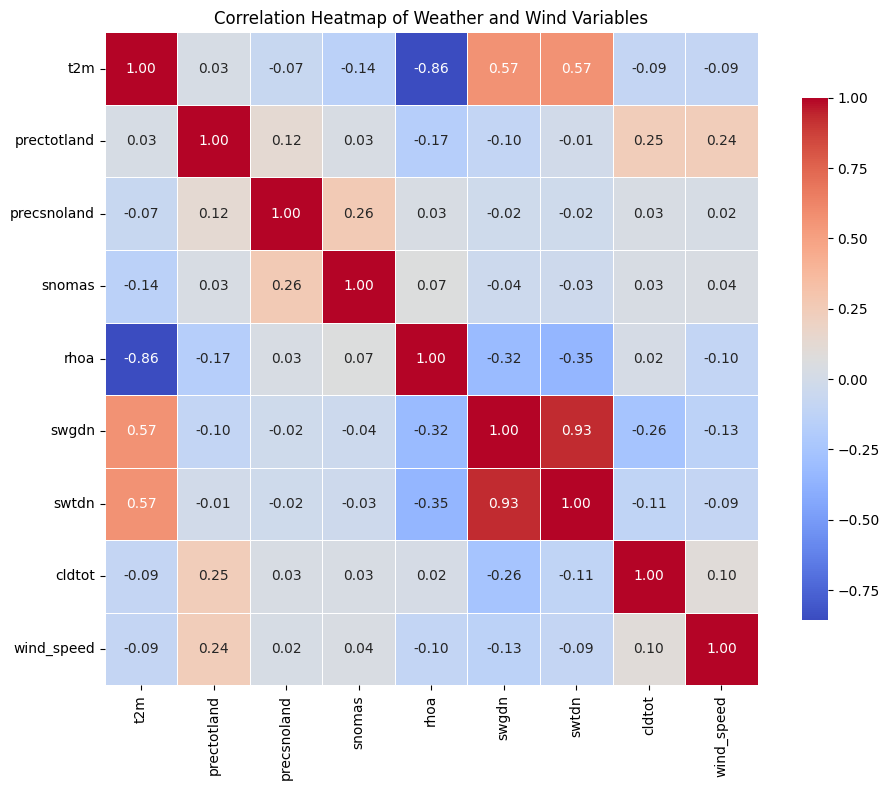

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
columns_to_plot = [
    't2m', 'prectotland', 'precsnoland', 'snomas', 'rhoa',
    'swgdn', 'swtdn', 'cldtot', 'wind_speed'
]

# Compute the correlation matrix
corr_matrix = all_data[columns_to_plot].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Weather and Wind Variables")
plt.tight_layout()
plt.show()

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         87672 non-null  datetime64[ns]
 1   local_time   87672 non-null  object        
 2   t2m          87672 non-null  float64       
 3   prectotland  87672 non-null  float64       
 4   precsnoland  87672 non-null  float64       
 5   snomas       87672 non-null  float64       
 6   rhoa         87672 non-null  float64       
 7   swgdn        87672 non-null  float64       
 8   swtdn        87672 non-null  float64       
 9   cldtot       87672 non-null  float64       
 10  wind_speed   87671 non-null  float64       
 11  quarter      87672 non-null  int64         
 12  month        87672 non-null  int64         
 13  month_name   87672 non-null  object        
 14  day          87672 non-null  int64         
 15  hour         87672 non-null  int64         
dtypes: d

In [10]:
all_data.describe()

,t2m,prectotland,precsnoland,snomas,rhoa,swgdn,swtdn,cldtot,wind_speed,quarter,month,day,hour
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87671.000000,87672.000000,87672.000000,87672.000000,87672.000000
mean,10.694493,0.105062,0.000803,0.027722,1.228242,145.880884,277.291844,0.597549,7.030934,2.508349,6.522310,15.731454,11.500000
std,5.749314,0.286380,0.020793,0.311913,0.027889,223.271359,359.471934,0.353976,2.370507,1.117152,3.448893,8.800909,6.922226
min,-6.158000,0.000000,0.000000,0.000000,1.138000,0.000000,0.000000,0.000000,1.751000,1.000000,1.000000,1.000000,0.000000
25%,6.567000,0.001000,0.000000,0.000000,1.208000,0.000000,0.000000,0.260000,5.450000,2.000000,4.000000,8.000000,5.750000
50%,10.375000,0.013000,0.000000,0.000000,1.226000,5.437000,30.513500,0.683000,6.847000,3.000000,7.000000,16.000000,11.500000
75%,14.708250,0.070000,0.000000,0.000000,1.247000,224.821000,518.392750,0.946000,8.239000,4.000000,10.000000,23.000000,17.250000
max,33.218000,5.192000,3.056000,9.420000,1.321000,929.732000,1159.157000,1.000000,19.691000,4.000000,12.000000,31.000000,23.000000


In [11]:
all_data['swgdn'].describe()

count    87672.000000
mean       145.880884
std        223.271359
min          0.000000
25%          0.000000
50%          5.437000
75%        224.821000
max        929.732000
Name: swgdn, dtype: float64

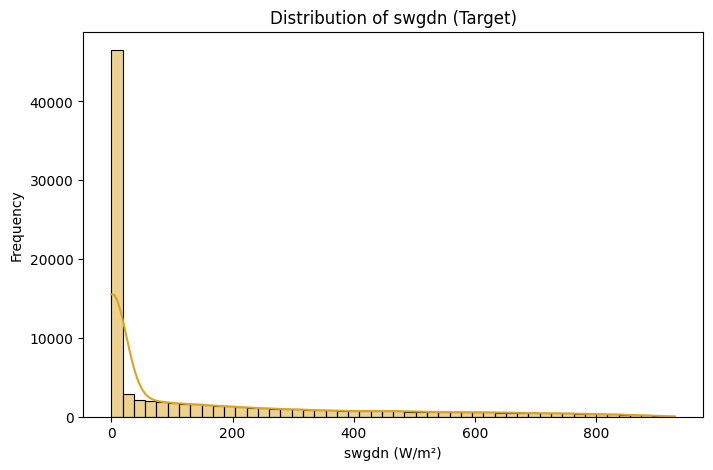

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(all_data['swgdn'], bins=50, kde=True, color="goldenrod")
plt.title("Distribution of swgdn (Target)")
plt.xlabel("swgdn (W/m²)")
plt.ylabel("Frequency")
plt.show()


In [13]:
corr = all_data.corr()['swgdn'].sort_values(ascending=False)
print(corr)


swgdn          1.000000
swtdn          0.930931
t2m            0.566331
hour           0.013752
day            0.003017
precsnoland   -0.022757
snomas        -0.037856
quarter       -0.040033
month         -0.040130
prectotland   -0.099309
wind_speed    -0.130820
cldtot        -0.259640
rhoa          -0.324933
Name: swgdn, dtype: float64


C:\Users\CN\AppData\Local\Temp\ipykernel_988\2527613514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = all_data.corr()['swgdn'].sort_values(ascending=False)


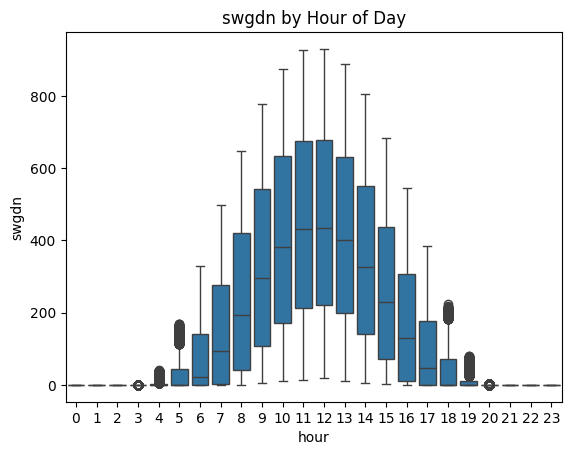

In [14]:
sns.boxplot(x="hour", y="swgdn", data=all_data)
plt.title("swgdn by Hour of Day")
plt.show()

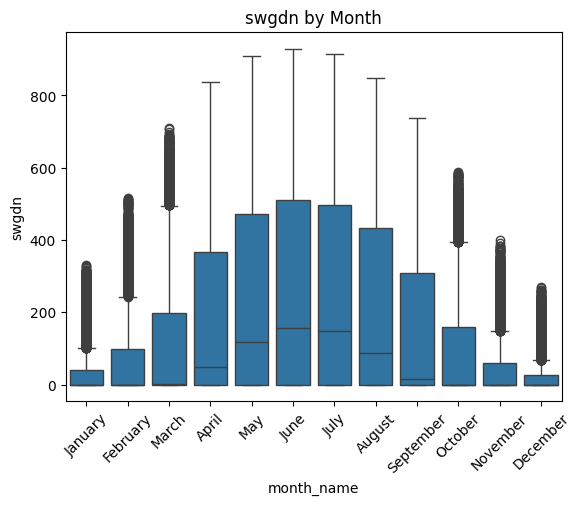

In [15]:
sns.boxplot(x="month_name", y="swgdn", data=all_data,
            order=["January", "February", "March", "April", "May", "June", 
                   "July", "August", "September", "October", "November", "December"])
plt.title("swgdn by Month")
plt.xticks(rotation=45)
plt.show()

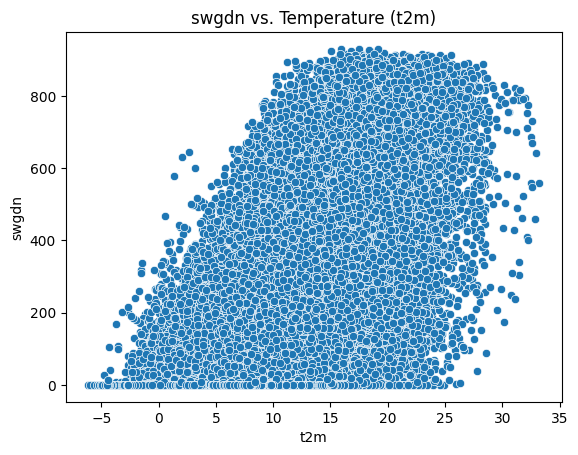

In [16]:
sns.scatterplot(x='t2m', y='swgdn', data=all_data)
plt.title("swgdn vs. Temperature (t2m)")
plt.show()


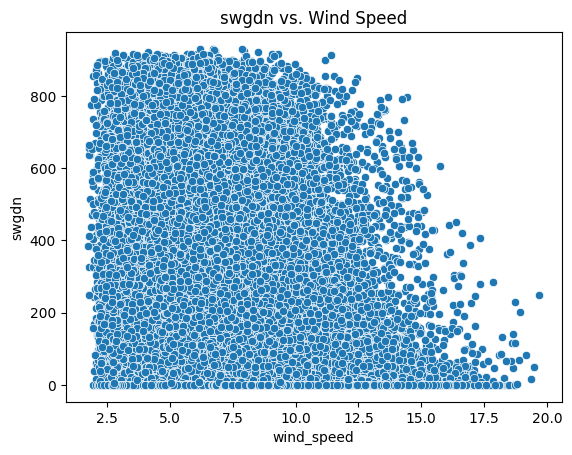

In [17]:
sns.scatterplot(x='wind_speed', y='swgdn', data=all_data)
plt.title("swgdn vs. Wind Speed")
plt.show()

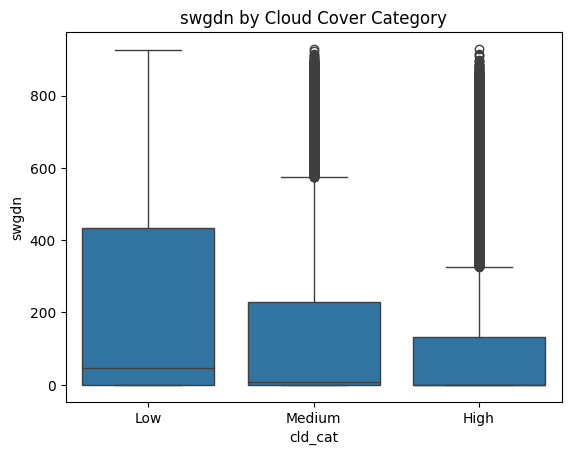

In [18]:
# Bin cloud cover into categories
all_data['cld_cat'] = pd.cut(all_data['cldtot'], bins=[0, 0.3, 0.7, 1.0], labels=["Low", "Medium", "High"])
sns.boxplot(x='cld_cat', y='swgdn', data=all_data)
plt.title("swgdn by Cloud Cover Category")
plt.show()

In [19]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'xgboost'